# A/B Testing 

## Simulated Click Data

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt

### Scenario

A marketing team is evaluating the effectiveness of a new call-to-action button on their website. They conducted an A/B test where the control group saw the current button and the treatment group saw the new button. The team collected click data from 1,000 users in each group and used a z-test for proportions to determine if the new button significantly increased click rates.

### Experiment Parameters

In [2]:
# Define parameters
baseline_rate = 0.10  # Baseline conversion rate
mde = 0.02            # Minimum detectable effect size
alpha = 0.05          # Significance level
power = 0.80          # Desired power
n_simulations = 1000  # Number of simulations for Bayesian approach

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

#Sample size
n = 1000

# We will simulate click data for control and treatment groups
# 1 indicates success (click), 0 indicates failure (no click)
np.random.seed(42)
control_clicks = np.random.binomial(1, 0.1, n)  # 10% success rate
treatment_clicks = np.random.binomial(1, 0.12, n)  # 12% success rate

### Visualize Data

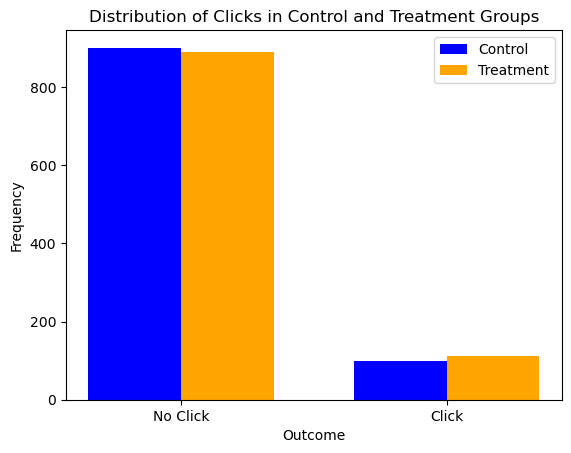

In [4]:
# Visualize the data distributions

# Calculate frequencies
control_counts = np.bincount(control_clicks)
treatment_counts = np.bincount(treatment_clicks)

# Define the bar width and positions
bar_width = 0.35
indices = np.arange(len(control_counts))

# Plot side-by-side bar plots
plt.bar(indices, control_counts, bar_width, label='Control', color='blue')
plt.bar(indices + bar_width, treatment_counts, bar_width, label='Treatment', color='orange')

# Customize the plot
plt.xticks(indices + bar_width / 2, ['No Click', 'Click'])
plt.legend(loc='upper right')
plt.title('Distribution of Clicks in Control and Treatment Groups')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.show()

### Required Sample Size

- Frequentist Sample Size : Uses predefined formulas and is relatively straightforward, focusing on statistical significance and power.
- Bayesian Sample Size : Often relies on simulation-based methods to determine the required sample size based on posterior probabilities and credible intervals, providing a more flexible and probabilistic framework.

In [5]:
# Function to calculate sample size
def calculate_sample_size(baseline_rate, mde, alpha=0.05, power=0.80):
    p1 = baseline_rate
    p2 = baseline_rate + mde
    z_alpha = stats.norm.ppf(1 - alpha / 2)
    z_beta = stats.norm.ppf(power)
    n = ((z_alpha + z_beta) ** 2 * (p1 * (1 - p1) + p2 * (1 - p2))) / (mde ** 2)
    return int(np.ceil(n))


In [6]:
sample_size = calculate_sample_size(baseline_rate, mde, alpha, power)
print(f"MDE: {mde:.2%}, Sample Size per Group: {sample_size}")

MDE: 2.00%, Sample Size per Group: 3839


### Effect Size

The magnitude of the difference between two groups, indicating the practical significance of that difference. The choice of priors can significantly affect the results, especially when the sample size is small. With more data, the influence of the prior diminishes, and the posterior distribution is dominated by the likelihood (i.e., the observed data).

In [7]:
# Calculate proportions
p_c = np.mean(control_clicks)
p_t = np.mean(treatment_clicks)

# Absolute Difference
absolute_diff = p_t - p_c
print(f"Absolute Difference: {absolute_diff:.4f}")

# Relative Difference (Percentage Change)
relative_diff = (absolute_diff / p_c) * 100
print(f"Relative Difference: {relative_diff:.2f}%")

# Odds Ratio
odds_control = p_c / (1 - p_c)
odds_treatment = p_t / (1 - p_t)
odds_ratio = odds_treatment / odds_control
print(f"Odds Ratio: {odds_ratio:.4f}")

# Conversion Rate Lift
conversion_lift = (p_t - p_c) / p_c * 100
print(f"Conversion Rate Lift: {conversion_lift:.2f}%")

Absolute Difference: 0.0120
Relative Difference: 12.00%
Odds Ratio: 1.1351
Conversion Rate Lift: 12.00%


### Significance Testing 

For the analysis of binary outcome data, tests like the z-test for proportions and chi-square test are appropriate and take into account the nature of the data.

- t-test: Determines if there is a significant difference between the means of two groups.
- Mann-Whitney U Test: Non-parametric test used when the data does not follow a normal distribution.
- Chi-square Test: Tests for independence between two categorical variables.
- Z-test for Proportions:Tests the difference between two population proportions.

In [14]:
## A/A Testing

# Perform z-test for proportions (as used in A/B testing)
success_A1 = np.sum(control_clicks)
success_A2 = np.sum(control_clicks)
count = np.array([success_A1, success_A2])
nobs = np.array([n, n])
z_stat, p_value = proportions_ztest(count, nobs)
print(f"A/A Test: z-statistic: {z_stat:.3f}, p-value: {p_value:.3f}")

A/A Test: z-statistic: 0.000, p-value: 1.000


In [8]:
# Create dataframes for control and treatment groups
control = pd.DataFrame({'click': control_clicks})
treatment = pd.DataFrame({'click': treatment_clicks})

# Perform t-test
t_stat, p_value_ttest = stats.ttest_ind(control_clicks, treatment_clicks)
print(f"t-test: t-statistic: {t_stat:.3f}, p-value: {p_value_ttest:.3f}")

# Perform Mann-Whitney U test (non-parametric test)
u_stat, p_value_mannwhitney = stats.mannwhitneyu(control_clicks, treatment_clicks)
print(f"Mann-Whitney U test: U-statistic: {u_stat:.3f}, p-value: {p_value_mannwhitney:.3f}")

# Create a contingency table for chi-square test
contingency_table = pd.crosstab(control_clicks, treatment_clicks, rownames=['Control'], colnames=['Treatment'])
print("\nContingency Table:")
print(contingency_table)

# Perform chi-square test
chi2_stat, p_value_chi2, dof, expected = stats.chi2_contingency(contingency_table)
print(f"\nChi-square test: chi2-statistic: {chi2_stat:.3f}, p-value: {p_value_chi2:.3f}, degrees of freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Perform z-test for proportions (most appropriate)
control_success = np.sum(control_clicks)
treatment_success = np.sum(treatment_clicks)
n_control = len(control_clicks)
n_treatment = len(treatment_clicks)

count = np.array([control_success, treatment_success])
nobs = np.array([n_control, n_treatment])
z_stat, p_value_ztest = proportions_ztest(count, nobs)
print(f"\nZ-test for proportions: z-statistic: {z_stat:.3f}, p-value: {p_value_ztest:.3f}")

# Interpretation
alpha = 0.05
print("\nInterpretation:")
if p_value_ttest < alpha:
    print("t-test: Reject the null hypothesis: There is a significant difference between control and treatment groups.")
else:
    print("t-test: Fail to reject the null hypothesis: There is no significant difference between control and treatment groups.")

if p_value_mannwhitney < alpha:
    print("Mann-Whitney U test: Reject the null hypothesis: There is a significant difference between control and treatment groups.")
else:
    print("Mann-Whitney U test: Fail to reject the null hypothesis: There is no significant difference between control and treatment groups.")

if p_value_chi2 < alpha:
    print("Chi-square test: Reject the null hypothesis: There is a significant association between control and treatment groups.")
else:
    print("Chi-square test: Fail to reject the null hypothesis: There is no significant association between control and treatment groups.")

if p_value_ztest < alpha:
    print("Z-test for proportions: Reject the null hypothesis: There is a significant difference in proportions between control and treatment groups.")
else:
    print("Z-test for proportions: Fail to reject the null hypothesis: There is no significant difference in proportions between control and treatment groups.")

t-test: t-statistic: -0.871, p-value: 0.384
Mann-Whitney U test: U-statistic: 494000.000, p-value: 0.384

Contingency Table:
Treatment    0    1
Control            
0          799  101
1           89   11

Chi-square test: chi2-statistic: 0.000, p-value: 1.000, degrees of freedom: 1
Expected Frequencies:
[[799.2 100.8]
 [ 88.8  11.2]]

Z-test for proportions: z-statistic: -0.872, p-value: 0.383

Interpretation:
t-test: Fail to reject the null hypothesis: There is no significant difference between control and treatment groups.
Mann-Whitney U test: Fail to reject the null hypothesis: There is no significant difference between control and treatment groups.
Chi-square test: Fail to reject the null hypothesis: There is no significant association between control and treatment groups.
Z-test for proportions: Fail to reject the null hypothesis: There is no significant difference in proportions between control and treatment groups.


## Bayesian Appraoch

Instead of focusing on p-values and statistical significance, Bayesian methods estimate the posterior distributions of conversion rates and allow for direct probability statements about the difference between groups.

The Beta distribution is a conjugate prior for the binomial likelihood. This means that if the prior distribution of a parameter is Beta and the likelihood function is binomial, the posterior distribution will also be a Beta distribution

In [9]:
#!pip install pymc

In [10]:
import pymc as pm
import arviz as az

# Count successes and failures
control_success = np.sum(control_clicks)
treatment_success = np.sum(treatment_clicks)
control_failures = len(control_clicks) - control_success
treatment_failures = len(treatment_clicks) - treatment_success

# Bayesian A/B testing with PyMC3
with pm.Model() as model:
    # Priors for conversion rates
    prior_alpha = 1 #uninformative prior
    prior_beta = 1 #uninformative prior
    
    control_rate = pm.Beta('control_rate', alpha=prior_alpha, beta=prior_beta)
    treatment_rate = pm.Beta('treatment_rate', alpha=prior_alpha, beta=prior_beta)
    
    # Likelihood
    control_likelihood = pm.Binomial('control_likelihood', n=len(control_clicks), p=control_rate, observed=control_success)
    treatment_likelihood = pm.Binomial('treatment_likelihood', n=len(treatment_clicks), p=treatment_rate, observed=treatment_success)
    
    # Posterior samples
    trace = pm.sample(2000, return_inferencedata=False)

# Posterior distribution plots
with model:
    pm.plot_posterior(trace, var_names=['control_rate', 'treatment_rate'], hdi_prob=0.95)
    plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [control_rate, treatment_rate]


Output()

Probability that treatment rate is greater than control rate: 0.823


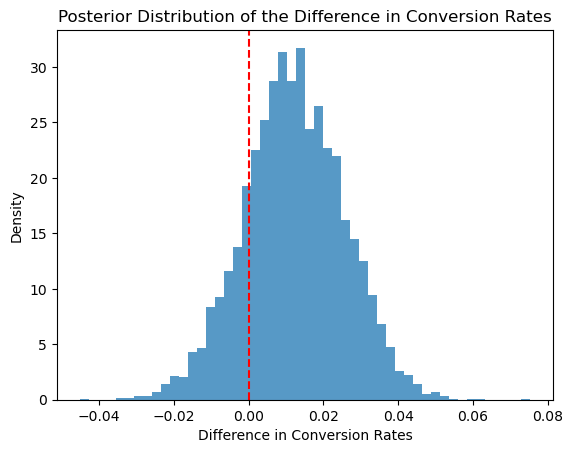

In [11]:
# Probability that treatment rate is greater than control rate
prob_treatment_better = np.mean(trace['treatment_rate'] > trace['control_rate'])
print(f"Probability that treatment rate is greater than control rate: {prob_treatment_better:.3f}")

# Plot the difference in conversion rates
diff = trace['treatment_rate'] - trace['control_rate']
plt.hist(diff, bins=50, density=True, alpha=0.75)
plt.axvline(0, color='red', linestyle='--')
plt.title('Posterior Distribution of the Difference in Conversion Rates')
plt.xlabel('Difference in Conversion Rates')
plt.ylabel('Density')
plt.show()

### Plot 
- The red dashed line at x = 0 represents the point where there is no difference in conversion rates between the treatment and control groups.
- Left of Red Line (Negative Differences): Control group performs better than the treatment group.
- Right of Red Line (Positive Differences): Treatment group performs better than the control group.
    
### Conclusion:

The majority of the posterior distribution lies to the right of zero, suggesting that the treatment group generally has a higher conversion rate than the control group. 
The distribution is centered around a positive value, reinforcing the likelihood that the treatment has a positive effect.
There is an 82.3% probability that the conversion rate of the treatment group is higher than that of the control group based on the posterior distribution.